# Genetic programming: symbolic regresion

In [78]:
%load_ext autoreload
%autoreload 2
import gp
import plotting as pl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from itertools import product
from random import seed
from math import sin, cos, pi, exp, sqrt, log

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
# set of problems
problems = ({'func' : lambda x: exp(abs(x))*sin(x), 'interval' : np.array(list(product(np.arange(-3,3.1,0.1)))), 'name' : 'e^|x|*sin(x)'},)
def generate_dataset(inputs, func):
    outputs = np.zeros_like(inputs[:, 0])
    for i, t in enumerate(inputs):
        outputs[i] = func(*t)
    return np.column_stack([inputs, np.vstack(outputs)])


In [86]:
# gp parameters
def add(x, y): return x + y
def sub(x, y): return x - y
def mul(x, y): return x * y
def safe_div(x, y): return x / y if y != 0 else x
def safe_log(x): return log(abs(x))

BINARY_FUNCTIONS = (add, sub, mul, safe_div)
UNARY_FUNCTIONS = (abs, sin, cos, exp)
FUNC_NAMES = {add : '+', sub : '-', mul : '*', safe_div : '/', sin : 'sin', cos : 'cos', abs : 'abs', exp : 'e^'}
INPUTS = ['x']
TERMINALS = [-1, 0, 1] + INPUTS


gp.Parameters.gp_rules = {
    'binary_functions' : BINARY_FUNCTIONS,
    'unary_functions' :  UNARY_FUNCTIONS,
    'func_names' :       FUNC_NAMES,
    'terminals' :        TERMINALS,
    'inputs' :           INPUTS,
    'pop_size' :         128, # population size
    'min_depth' :        2, # minimal initial random tree depth
    'max_depth' :        4, # maximal initial random tree depth
    'generations' :      np.inf, # maximal number of generations to run evolution
    'tournament_size' :  3, # size of tournament for tournament selection
    'xo_rate' :          0.5, # crossover rate
    'prob_mutation' :    0.1, # per-node mutation probability
    'epsilon' :          0.1, # epsilon used to compute hit rate
    'evaluations_limit' : 10**7
}

/home/honza/Documents/school/gp/gp.py:484: RuntimeWarning: invalid value encountered in double_scalars
  error_sum += abs(self.trainers_exact_fitnesses[i] - self.owner.fitness(t, test_cases=predictor.test_cases))


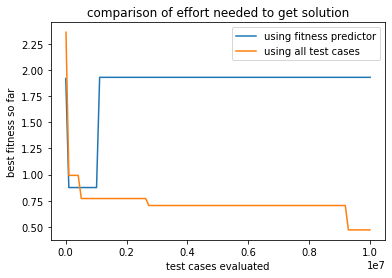

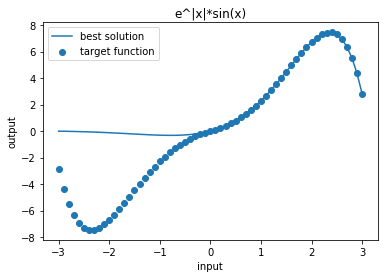

[-2.9, -2.099999999999999, 0.20000000000000284, 0.6000000000000032, 0.6000000000000032, 1.0000000000000036, 2.5000000000000053, 2.800000000000005]
f_sol(x) = (sin(x) * e^(x))


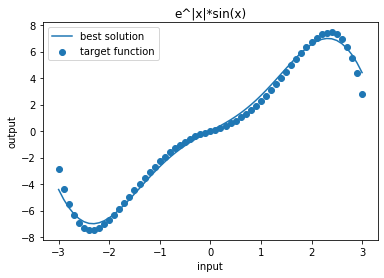

evolution ended after 2966 generations, best solution with fitness 0.05:
f_sol(x) = ((1 * sin(x)) + (((x * x) * sin(x)) + x))


In [87]:
# run gp on problems with parameters specified above
seed() # set seed here to reproduce same conditions

 
for problem in problems:
    d = generate_dataset(problem['interval'], problem['func'])
    x = gp.GeneticProgram(d)
    fp_manager = gp.SLFitnessPredictorManager(x, d.shape[0])
    res = x.run_evolution(fp_manager=fp_manager, verbose=False)
    # plot the results
    '''pl.simple_line_plot(list(range(1, res['generations'])), res['best_of_run_fitnesses'], 'generations', 'best fitness so far', 'best solution fitness')
    plt.show()
    pl.simple_line_plot(list(range(1, res['generations'])), res['avg_sizes'], 'generations', 'average size of solutions', 'average size')
    plt.show()'''
    res2 = x.run_evolution(fp_manager=None, verbose=False)
    # only plot 100 points, no need for all of them
    plot_points1 = np.linspace(0, res['test_cases_evaluations'].size - 1, 100, dtype=np.int32)
    plot_points2 = np.linspace(0, res2['test_cases_evaluations'].size - 1, 100, dtype=np.int32)
    pl.simple_line_plot(res['test_cases_evaluations'][plot_points1], res['best_of_run_fitnesses'][plot_points1], label='using fitness predictor')
    pl.simple_line_plot(res2['test_cases_evaluations'][plot_points2], res2['best_of_run_fitnesses'][plot_points2], 'test cases evaluated', 'best fitness so far', 'comparison of effort needed to get solution', label='using all test cases')
    plt.legend()
    plt.show()
    pl.plot_solution_and_target(res['best'], problem['name'], d)
    print(sorted(d[:, 0][res['used_test_cases']]))
    print(f'f_sol(x) = {res["best"].to_str_simplified()}')
    pl.plot_solution_and_target(res2['best'], problem['name'], d)
    print(f'evolution ended after {res["generations"]} generations, best solution with fitness {res["best_f"]}:')
    print(f'f_sol(x) = {res2["best"].to_str_simplified()}')